# BitCoin Predictor (Start Simple)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-26,5747.950195,5976.799805,5721.220215,5904.830078,5904.830078,1.905040e+09
1,2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,5780.899902,1.710130e+09
2,2017-10-28,5787.819824,5876.720215,5689.189941,5753.089844,5753.089844,1.403920e+09
3,2017-10-29,5754.439941,6255.709961,5724.580078,6153.850098,6153.850098,2.859040e+09
4,2017-10-30,6114.850098,6214.990234,6040.850098,6130.529785,6130.529785,1.772150e+09


<AxesSubplot:>

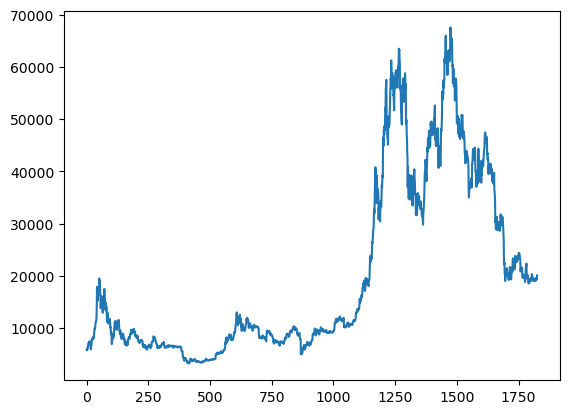

In [2]:
data['Close'].plot()

## Time to figure out if there is usable data from yahoo

I will just look really quickly to see if there is any missing or repeated data. It seems like there is only one so I will just toss it out since it's small

In [3]:
hf = data.loc[np.isnan(data['Close'])]

In [4]:
print(len(hf.index))

1


In [5]:
data.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [6]:
data.drop(index=1826, axis=1, inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-26,5747.950195,5976.799805,5721.220215,5904.830078,5904.830078,1.905040e+09
1,2017-10-27,5899.740234,5988.390137,5728.819824,5780.899902,5780.899902,1.710130e+09
2,2017-10-28,5787.819824,5876.720215,5689.189941,5753.089844,5753.089844,1.403920e+09
3,2017-10-29,5754.439941,6255.709961,5724.580078,6153.850098,6153.850098,2.859040e+09
4,2017-10-30,6114.850098,6214.990234,6040.850098,6130.529785,6130.529785,1.772150e+09
...,...,...,...,...,...,...,...
1822,2022-10-22,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,1.610444e+10
1823,2022-10-23,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,2.212879e+10
1824,2022-10-24,19567.769531,19589.125000,19206.324219,19345.572266,19345.572266,3.020224e+10
1825,2022-10-25,19344.964844,20348.412109,19261.447266,20095.857422,20095.857422,4.776152e+10


In [7]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
data.duplicated().sum()

0

Normalize the data and prep for model

In [9]:
features = ['Open','High', 'Low','Close', 'Adj Close', 'Volume']

In [10]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.039054,0.041234,0.040036,0.041475,0.041475,0.001434
1,0.041414,0.041411,0.040156,0.039548,0.039548,0.000876
2,0.039674,0.039707,0.039529,0.039116,0.039116,0.000000
3,0.039155,0.045491,0.040089,0.045346,0.045346,0.004163
4,0.044759,0.044870,0.045094,0.044983,0.044983,0.001053


In [11]:
output_var = feature_transform['Close']
feature_transform.drop(columns='Close')

,Open,High,Low,Adj Close,Volume
0,0.039054,0.041234,0.040036,0.041475,0.001434
1,0.041414,0.041411,0.040156,0.039548,0.000876
2,0.039674,0.039707,0.039529,0.039116,0.000000
3,0.039155,0.045491,0.040089,0.045346,0.004163
4,0.044759,0.044870,0.045094,0.044983,0.001053
...,...,...,...,...,...
1822,0.247788,0.243805,0.252267,0.248273,0.042054
1823,0.248338,0.249889,0.252140,0.253851,0.059288
1824,0.253936,0.249011,0.253439,0.250409,0.082384
1825,0.250472,0.260600,0.254312,0.262072,0.132615


In [12]:
feature_transform

,Open,High,Low,Close,Adj Close,Volume
0,0.039054,0.041234,0.040036,0.041475,0.041475,0.001434
1,0.041414,0.041411,0.040156,0.039548,0.039548,0.000876
2,0.039674,0.039707,0.039529,0.039116,0.039116,0.000000
3,0.039155,0.045491,0.040089,0.045346,0.045346,0.004163
4,0.044759,0.044870,0.045094,0.044983,0.044983,0.001053
...,...,...,...,...,...,...
1822,0.247788,0.243805,0.252267,0.248273,0.248273,0.042054
1823,0.248338,0.249889,0.252140,0.253851,0.253851,0.059288
1824,0.253936,0.249011,0.253439,0.250409,0.250409,0.082384
1825,0.250472,0.260600,0.254312,0.262072,0.262072,0.132615


In [13]:
old = output_var
output_var = output_var.shift(periods=-1)
old, output_var

(0       0.041475
 1       0.039548
 2       0.039116
 3       0.045346
 4       0.044983
           ...   
 1822    0.248273
 1823    0.253851
 1824    0.250409
 1825    0.262072
 1827    0.272349
 Name: Close, Length: 1827, dtype: float64,
 0       0.039548
 1       0.039116
 2       0.045346
 3       0.044983
 4       0.050235
           ...   
 1822    0.253851
 1823    0.250409
 1824    0.262072
 1825    0.272349
 1827         NaN
 Name: Close, Length: 1827, dtype: float64)

In [14]:
output_var.drop(labels=[1827], axis=0)

0       0.039548
1       0.039116
2       0.045346
3       0.044983
4       0.050235
          ...   
1821    0.248273
1822    0.253851
1823    0.250409
1824    0.262072
1825    0.272349
Name: Close, Length: 1826, dtype: float64

In [15]:
feature_transform.drop(labels=[1827], axis=0)

,Open,High,Low,Close,Adj Close,Volume
0,0.039054,0.041234,0.040036,0.041475,0.041475,0.001434
1,0.041414,0.041411,0.040156,0.039548,0.039548,0.000876
2,0.039674,0.039707,0.039529,0.039116,0.039116,0.000000
3,0.039155,0.045491,0.040089,0.045346,0.045346,0.004163
4,0.044759,0.044870,0.045094,0.044983,0.044983,0.001053
...,...,...,...,...,...,...
1821,0.245935,0.243642,0.246550,0.247718,0.247718,0.088840
1822,0.247788,0.243805,0.252267,0.248273,0.248273,0.042054
1823,0.248338,0.249889,0.252140,0.253851,0.253851,0.059288
1824,0.253936,0.249011,0.253439,0.250409,0.250409,0.082384


In [16]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

## Modeling 

I think I have the data in a pretty spot. I changed filtered, normalized, and set the output variable to be tomorrow's closing price. I chose closing price over adjusted close because a little google told m e that adjusted close was more of an indicator to change rather than just close. I figured I would leave the indicator as part of the model and care about the close. After all, I really only care about the money and final close.

I will be using a model created by Jingyi Shen & M. Omair Shafiq. Hopefully this doesn't count as copyright? I read their paper linked below and figured I would try and replicate their results but using bitcoin. I use algorithm2


----------> https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00333-6

In [17]:
!pip install tensorflow==2.5

In [18]:
!pip install --upgrade numpy==1.19.5
import numpy
numpy.__version__

'1.19.5'

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, LSTM

In [20]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (1661, 6)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = "mean_absolute_error", metrics= [tf.keras.metrics.MeanSquaredError(),
                                                                          ])

In [21]:
X_train = np.expand_dims(X_train, axis=0)
X_train

array([[[0.03905365, 0.04123411, 0.04003618, 0.04147467, 0.04147467,
         0.00143356],
        [0.04141381, 0.04141103, 0.04015645, 0.0395482 , 0.0395482 ,
         0.00087598],
        [0.03967358, 0.03970651, 0.0395293 , 0.0391159 , 0.0391159 ,
         0.        ],
        ...,
        [0.43194549, 0.43865305, 0.39529689, 0.39949584, 0.39949584,
         0.19734564],
        [0.39961246, 0.40841592, 0.36649642, 0.40122748, 0.40122748,
         0.18762015],
        [0.40107678, 0.42203682, 0.40498052, 0.40488598, 0.40488598,
         0.11853967]]])

In [22]:
X_train.shape

(1, 1661, 6)

In [23]:
y_train = np.expand_dims(y_train, axis=0)
y_train

array([[0.0395482 , 0.0391159 , 0.04534565, ..., 0.40122748, 0.40488598,
        0.41760417]])

In [24]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.3004 - mean_squared_error: 0.1952
Epoch 2/100
1/1 [==============================] - 0s 221ms/step - loss: 0.2545 - mean_squared_error: 0.1466
Epoch 3/100
1/1 [==============================] - 0s 219ms/step - loss: 0.2111 - mean_squared_error: 0.1063
Epoch 4/100
1/1 [==============================] - 0s 208ms/step - loss: 0.1695 - mean_squared_error: 0.0735
Epoch 5/100
1/1 [==============================] - 0s 210ms/step - loss: 0.1316 - mean_squared_error: 0.0477
Epoch 6/100
1/1 [==============================] - 0s 212ms/step - loss: 0.1015 - mean_squared_error: 0.0283
Epoch 7/100
1/1 [==============================] - 0s 213ms/step - loss: 0.0812 - mean_squared_error: 0.0150
Epoch 8/100
1/1 [==============================] - 0s 214ms/step - loss: 0.0659 - mean_squared_error: 0.0073
Epoch 9/100
1/1 [==============================] - 0s 208ms/step - loss: 0.0610 - mean_squared_error: 0.0046
Epoch 10/100
1/1 [====

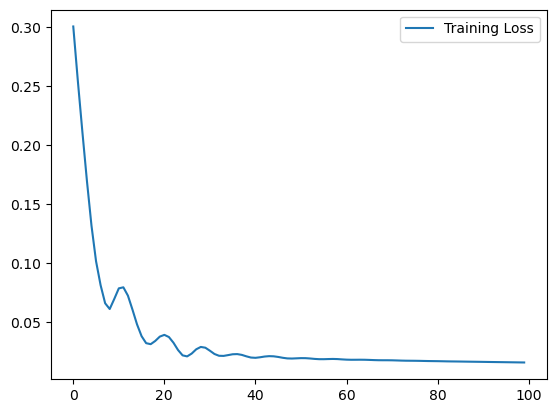

In [25]:
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()
plt.show()


In [26]:
X_test = np.expand_dims(X_test, axis=0)
X_test

array([[[0.40503758, 0.41086368, 0.40372369, 0.41760417, 0.41760417,
         0.07774241],
        [0.41767791, 0.42788881, 0.41677671, 0.43631778, 0.43631778,
         0.06989121],
        [0.43642653, 0.42784532, 0.41241127, 0.41389909, 0.41389909,
         0.08928258],
        [0.41400562, 0.41852137, 0.41745027, 0.42264989, 0.42264989,
         0.07923457],
        [0.42274516, 0.41736477, 0.40399844, 0.39613685, 0.39613685,
         0.08548176],
        [0.39624808, 0.4144957 , 0.40381936, 0.42091628, 0.42091628,
         0.09259971],
        [0.42098255, 0.41807088, 0.40515896, 0.40360565, 0.40360565,
         0.08394875],
        [0.40370375, 0.40164533, 0.40885869, 0.40720407, 0.40720407,
         0.04540204],
        [0.40732062, 0.41442106, 0.41277998, 0.42106223, 0.42106223,
         0.05786526],
        [0.42095577, 0.41693539, 0.40803841, 0.40202272, 0.40202272,
         0.08604871],
        [0.40216854, 0.40447656, 0.40504793, 0.41067615, 0.41067615,
         0.0721258 ],

In [27]:
predict = model.predict(X_test)
predict

array([[[0.07869563],
        [0.15691513],
        [0.2273699 ],
        [0.28684416],
        [0.33273885],
        [0.36882466],
        [0.39459014],
        [0.4101284 ],
        [0.42193332],
        [0.4284785 ],
        [0.4304081 ],
        [0.43079165],
        [0.42896628],
        [0.42497423],
        [0.4201454 ],
        [0.41614002],
        [0.41949752],
        [0.42485428],
        [0.42681068],
        [0.42639002],
        [0.4247423 ],
        [0.42169356],
        [0.41928822],
        [0.42171586],
        [0.4245844 ],
        [0.42548355],
        [0.4243701 ],
        [0.42154673],
        [0.41629285],
        [0.40802792],
        [0.39286593],
        [0.37188002],
        [0.35288242],
        [0.3331034 ],
        [0.31394652],
        [0.29579714],
        [0.2823833 ],
        [0.27334285],
        [0.2681591 ],
        [0.2633098 ],
        [0.26159078],
        [0.26231387],
        [0.26401213],
        [0.2659443 ],
        [0.26719037],
        [0

In [31]:
df = pd.DataFrame(data=predict[0])
shifted_prediction = df.shift(periods=-1)
shifted_prediction.drop([165])

,0
0,0.156915
1,0.227370
2,0.286844
3,0.332739
4,0.368825
...,...
160,0.246671
161,0.247175
162,0.248064
163,0.251544


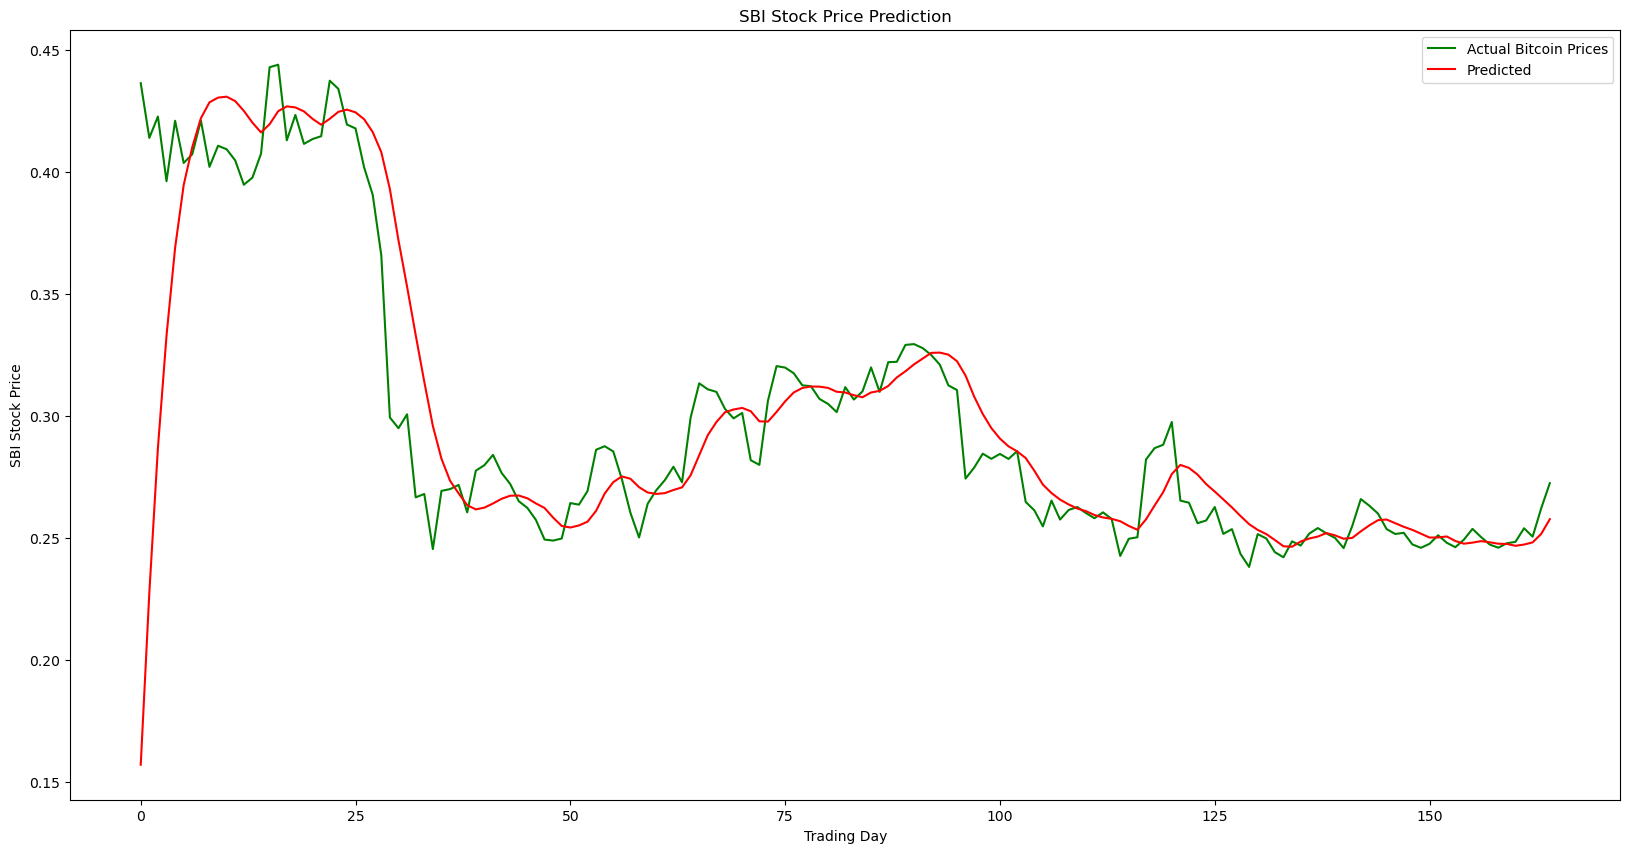

In [33]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'green', label = 'Actual Bitcoin Prices')
plt.plot(shifted_prediction, color = 'red', label = 'Predicted')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()